# Trabajo Semanal N°1
### Alumno: Magdalena Guida
### Primeros pasos en la simulacion

El objetivo de este trabajo es el analisis de la relacion frecuencia de señal vs frecuencia de muestreo. Para esto se define la frecuencia de Nyquist, un valor de frecuencia que indica bajo que condicion la señal se muestreara correctamente. $f_{Nyquist} = \frac{f_s}{2}$ y debe cumplir que $ff≤\frac{f_s}{2}$.

¿Que sucede cuando no se cumple? Ocurre un fenomeno denominado **Aliasing**, significa una superposicion de frecuencias, concluyendo en una señal muestreada en una frecuencia distinta a la original llamada $f_{alias}$, y se calcula de la siguiente manera: $f_{alias} = | ff - k*f_s |$, en donde $k$ representa al numero entero mas cercano a la division entre $\frac{ff}{f_s}$.

Para estas pruebas, se diseña una señal senoidal con las siguientes variables: 
- Amplitud ($V_max$) $[Volts]$
- Valor medio ($dc$) $[Volts]$
- Frecuencia ($frec = ff) [Hz]$
- Fase $(ph) [rad]$
- Cantidad de muestras a digitalizar ($N$)
- Frecuencia de muestreo ($fs) [Hz]$

Ademas, se definen: 
- Ciclo de la señal: $T = \frac{1}{ff}$
- Tiempo entre muestras: $T_s = \frac{1}{f_s}$

Se utilizaran los siguientes valores para $ff =${$1, 500, 501, 999, 1000, 1001$} 



In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs =1000 # Frecuencia de muestreo
N = 1000   # Número de muestras
ts = 1 / fs  # Tiempo de muestreo
df = fs / N  # Resolución espectral    

# Definir funciónes seno
def func_sen(V_max=1, dc=0, frec=1, ph=0, nn=N, fs=fs):
    
    tt = np.arange(0, nn / fs, 1 / fs).flatten()
    
    xx = V_max * np.sin(2 * np.pi * frec * tt + ph).flatten() + dc
    
    return tt, xx


Como primera prueba se grafica en un mismo grafico los valores de $ff=${ $1, 999, 1001$}. Se analizan resultados posteriormente.

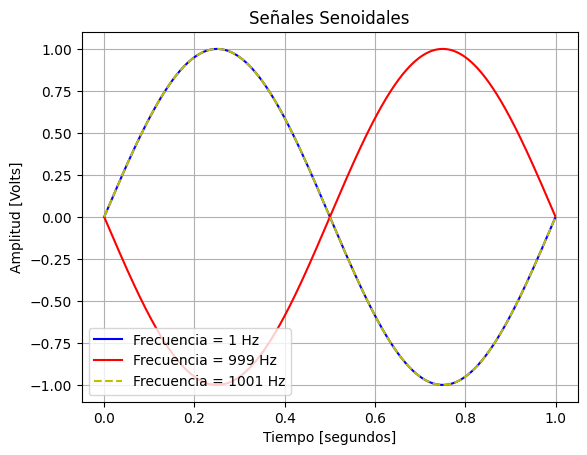

In [7]:
tt1, xx1 = func_sen(frec=1, fs=fs)
tt2, xx2 = func_sen(frec=999, fs=fs)
tt3, xx3 = func_sen(frec=1001, fs=fs)

#%%  GRAFICO
plt.title("Señales Senoidales")
plt.plot(tt1, xx1, label="Frecuencia = 1 Hz", color = 'b')
plt.plot(tt2, xx2, label="Frecuencia = 999 Hz", color = 'r')
plt.plot(tt3, xx3, label="Frecuencia = 1001 Hz", color = 'y', linestyle='--')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.show()

La señal para la frecuencia definida como $1 Hz$, cumple con las condiciones planteadas por Nyquist, por lo que se muestrea, como se espera. La señal con frecuencia de $ 1001Hz$, (linea punteada amarilla), se esperarian mas repeticiones sobre un mismo intervalo de tiempo por el contrario se ve que se muestreo la superpuesta sobre la señal anterior. Esto se debe al **aliasing**, producido por no cumplir la regla de Nyquist. Se le definio una $f_{alias} = |1000Hz - 1*1001Hz| = |-1Hz|$, con $k = 1$ porque es el valor entero mas cercano entre $\frac{ff}{f_s}$, por lo que se la muestreo con $f_{alias} = 1Hz$.
La tercer señal, con una $ff = 999Hz$, (rojo), tambien se esperarian muchas mas repeticiones, pero nueamente, no cumple Nyquist, y se define una $f_{alias} = 1Hz$. Se esperaria, que la señal muestree igual que las ultimas dos, pero lo hace exactamente 'al revez', como si tuviera una $ff = -1Hz$, este efecto se debe a que la frecuencia sigue siendo menor a la frecuencia de muestreo.

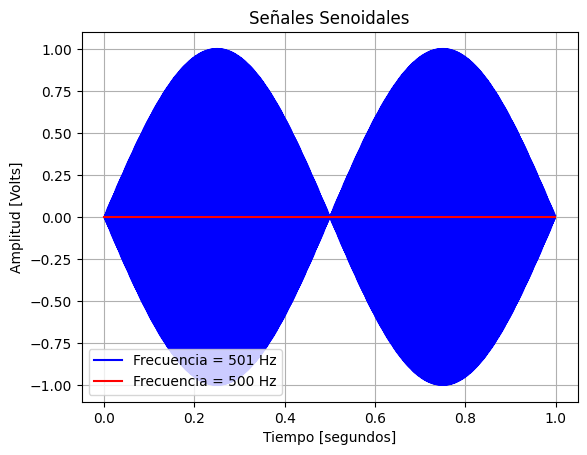

In [18]:
tt1, xx1 = func_sen(frec=501, fs=fs)
tt2, xx2 = func_sen(frec=500, fs=fs)

#%%  GRAFICO
plt.title("Señales Senoidales")
plt.plot(tt1, xx1, label="Frecuencia = 501 Hz", color = 'b')
plt.plot(tt2, xx2, label="Frecuencia = 500 Hz", color = 'r')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.show()

Ahora se muestrea una señal con $ff = 500Hz$, que cumple dentro de la regla de Nyquist, ya que esta pide que las frecuencias de señal sean 2 veces menores o *iguales* a la de muestreo, se encuentra en el caso 'limite'. El problema es, que aunque si sea posible muestrear la señal, no se obtiene una respuesta acorde. Si calculamos los $T = \frac{1}{500Hz}=0,002s$ y $T_s =\frac{1}{1000Hz}=0,001s$, se observa como el tiempo de muestreo solo 'entra' 2 veces en el periodo se la señal, por lo que se consiguen solo 2 'tomas' y asi se explica la constante sobre el valor de dc. 
La señal de $ff = 501Hz$, si sobrepasa la condicion de Nyquist, por lo que se muestrea con un $f_{alias} = 499Hz$.

La ultima prueba se realizara para $ff= 1000Hz = f_s$.

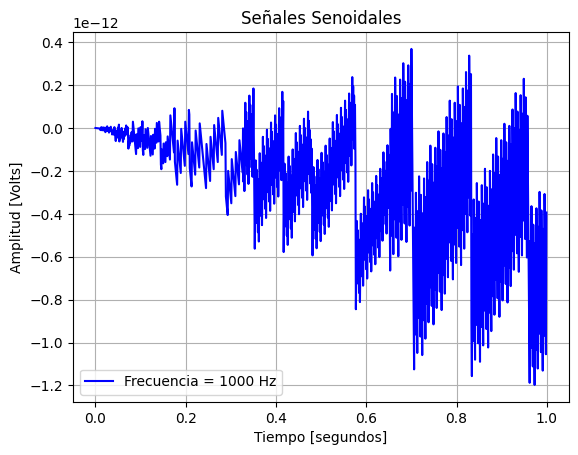

In [16]:
tt1, xx1 = func_sen(frec=1000, fs=fs)

#%%  GRAFICO
plt.title("Señales Senoidales")
plt.plot(tt1, xx1, label="Frecuencia = 1000 Hz", color = 'b')
plt.legend(loc = 'lower left')
plt.xlabel("Tiempo [segundos]")
plt.ylabel("Amplitud [Volts]")
plt.grid(True)
plt.show()

Analiticamente, se sabe que no se cumple Nyquist, se procede a calcular $f_{alias}$. Primero se busca el valor de $k = \frac{1000Hz}{1000Hz} =1$, se reemplaxa en la ecuacion $f_{alias} =|1000Hz - 1*1000Hz|=0$. No existe forma de superponer las frecuencias para muestrear.
En el grafico **NO** se reproduce la señal. 

Concluyo en una relacion frecuencia de muestreo- frecuencia de señal, clasificada en los siguientes rangos: 
- *Cumple Nyquist* = $ff$ MENOR a $\frac{f_s}{2}$ --> La señal se muestreara correctamente.
- $ff = \frac{f_s}{2}$ --> Constante con el valor de DC. Tambien sucedera lo MISMO para valores de $ff = \frac{f_s}{2} + m*ff$, siendo m un numero entero.
- *NO cumple Nyquist* = $ff$ MAYOR a $\frac{f_s}{2}$--> Se muestrearan con su frecuencia $f_{alias}$.
- $ ff = f_s$ --> **NO** se muestreara. Tambien sucedera para valores de $ff = ff + m*ff$, siendo m un numero entero. 